Loading and Normalizing CIFAR10 dataset

In [2]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms

batch_size = 32

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

def print_dimensions(loader, set_name):
    # Get one batch from the DataLoader
    dataiter = iter(loader)
    images, labels = next(dataiter)
    
    # Print dimensions
    print(f'{set_name} - Images dimensions: {images.shape}')  # Prints [batch_size, channels, height, width]
    print(f'{set_name} - Labels dimensions: {labels.shape}')  # Prints [batch_size]

# Print dimensions for train and test sets
print_dimensions(trainloader, 'Train')
print_dimensions(testloader, 'Test')


Files already downloaded and verified
Files already downloaded and verified
Train - Images dimensions: torch.Size([32, 3, 32, 32])
Train - Labels dimensions: torch.Size([32])
Test - Images dimensions: torch.Size([32, 3, 32, 32])
Test - Labels dimensions: torch.Size([32])


Implement the CNN Model

In [2]:
from cnn_train import train_and_evaluate as train_and_evaluate

In [3]:
# hyperparameters

learning_rate = 1e-4
max_epoch = 50
eval_freq = 10
optimizer = 'ADAM'

In [4]:
train_accuracy, train_loss, test_accuracy, test_loss = train_and_evaluate(trainloader, testloader, learning_rate, max_epoch, eval_freq, batch_size, optimizer)

Optimizer: ADAM
Epoch: 1, Train Accuracy: 0.33, Test Loss: 2.21
Epoch: 1, Test Accuracy: 0.37, Test Loss: 2.19
Epoch: 1, Train Accuracy: 0.33, Train Loss: 2.21
Epoch: 1, Test Accuracy: 0.37, Test Loss: 2.19
Epoch: 2, Train Accuracy: 0.39, Test Loss: 2.18
Epoch: 2, Test Accuracy: 0.41, Test Loss: 2.16
Epoch: 2, Train Accuracy: 0.39, Train Loss: 2.18
Epoch: 2, Test Accuracy: 0.41, Test Loss: 2.16
Epoch: 3, Train Accuracy: 0.42, Test Loss: 2.16
Epoch: 3, Test Accuracy: 0.43, Test Loss: 2.15
Epoch: 3, Train Accuracy: 0.42, Train Loss: 2.16
Epoch: 3, Test Accuracy: 0.43, Test Loss: 2.15
Epoch: 4, Train Accuracy: 0.44, Test Loss: 2.15
Epoch: 4, Test Accuracy: 0.46, Test Loss: 2.15
Epoch: 4, Train Accuracy: 0.44, Train Loss: 2.15
Epoch: 4, Test Accuracy: 0.46, Test Loss: 2.15
Epoch: 5, Train Accuracy: 0.47, Test Loss: 2.14
Epoch: 5, Test Accuracy: 0.48, Test Loss: 2.14
Epoch: 5, Train Accuracy: 0.47, Train Loss: 2.14
Epoch: 5, Test Accuracy: 0.48, Test Loss: 2.14
Epoch: 6, Train Accuracy: 0.4

Plot Diagram

In [9]:
import matplotlib.pyplot as plt

def plot_diagram(train_accuracy, train_loss, test_accuracy, test_loss, epochs):
    plt.figure()
    plt.plot(epochs, train_accuracy, label="Train Accuracy")
    plt.plot(epochs, test_accuracy, label="Test Accuracy")
    plt.title("Accuracy over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(epochs, train_loss, label="Train Loss")
    plt.plot(epochs, test_loss, label="Test Loss")
    plt.title("Loss over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

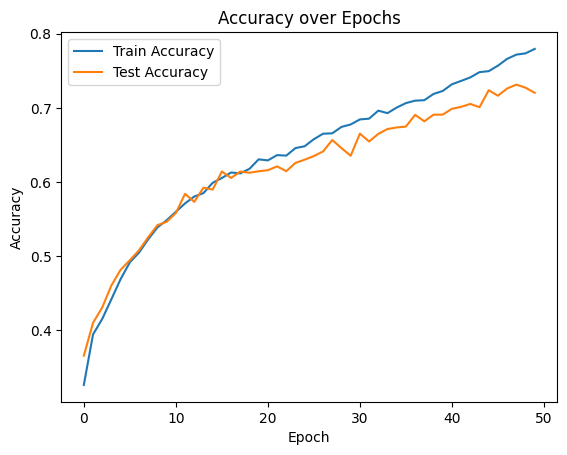

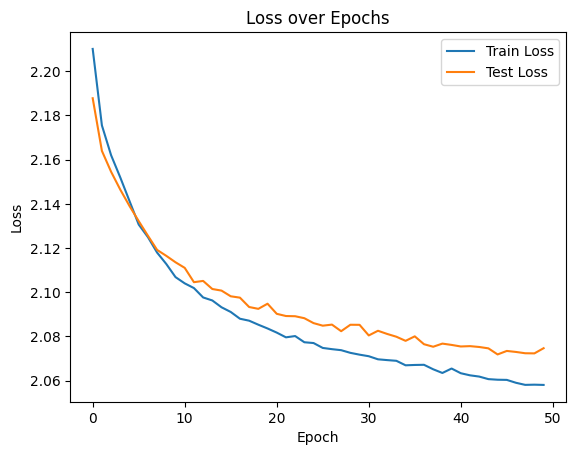

In [6]:
plot_diagram(train_accuracy, train_loss, test_accuracy, test_loss, np.arange(max_epoch))

Using SGD as Optimizer 

In [4]:
optimizer = 'SGD'

In [5]:
train_accuracy_sgd, train_loss_sgd, test_accuracy_sgd, test_loss_sgd = train_and_evaluate(trainloader, testloader, learning_rate, max_epoch, eval_freq, batch_size, optimizer)

Optimizer: SGD
Epoch: 1, Train Accuracy: 0.08, Test Loss: 2.30
Epoch: 1, Test Accuracy: 0.08, Test Loss: 2.30
Epoch: 1, Train Accuracy: 0.08, Train Loss: 2.30
Epoch: 1, Test Accuracy: 0.08, Test Loss: 2.30
Epoch: 2, Train Accuracy: 0.08, Test Loss: 2.30
Epoch: 2, Test Accuracy: 0.08, Test Loss: 2.30
Epoch: 2, Train Accuracy: 0.08, Train Loss: 2.30
Epoch: 2, Test Accuracy: 0.08, Test Loss: 2.30
Epoch: 3, Train Accuracy: 0.08, Test Loss: 2.30
Epoch: 3, Test Accuracy: 0.08, Test Loss: 2.30
Epoch: 3, Train Accuracy: 0.08, Train Loss: 2.30
Epoch: 3, Test Accuracy: 0.08, Test Loss: 2.30
Epoch: 4, Train Accuracy: 0.09, Test Loss: 2.30
Epoch: 4, Test Accuracy: 0.08, Test Loss: 2.30
Epoch: 4, Train Accuracy: 0.09, Train Loss: 2.30
Epoch: 4, Test Accuracy: 0.08, Test Loss: 2.30
Epoch: 5, Train Accuracy: 0.08, Test Loss: 2.30
Epoch: 5, Test Accuracy: 0.08, Test Loss: 2.30
Epoch: 5, Train Accuracy: 0.08, Train Loss: 2.30
Epoch: 5, Test Accuracy: 0.08, Test Loss: 2.30
Epoch: 6, Train Accuracy: 0.08

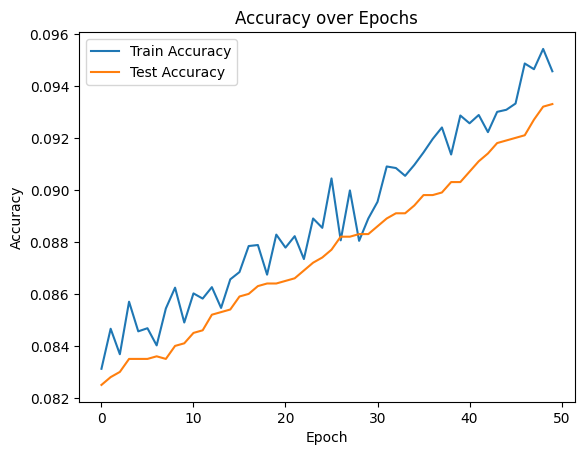

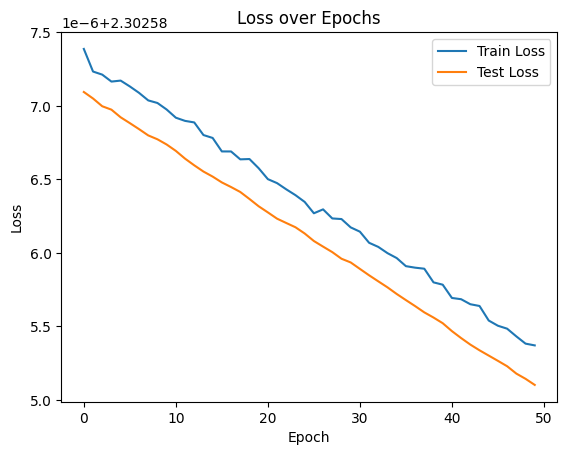

In [10]:
plot_diagram(train_accuracy_sgd, train_loss_sgd, test_accuracy_sgd, test_loss_sgd, np.arange(max_epoch))